In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
driver=webdriver.Chrome(executable_path = 'C:\ss\chromedriver')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="4594e6f76445316d1896106acfc04a02")>

In [3]:
driver.get('https://www.instagram.com/')

In [4]:
username=driver.find_element_by_name('username')
username.send_keys('sample_username')
password=driver.find_element_by_name('password')
password.send_keys('sample_password')
password.submit()

In [5]:
button=driver.find_elements_by_xpath("//div[@class = 'mt3GC']/button")[1].click()

In [8]:
# 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. 
# Open the first 10 handles and find the top 5 which have the highest number of followers
dic={}
c=0
for i in range(20):
    if c>10:
        break
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.clear()
    data.send_keys('food')
    driver.implicitly_wait(10)
    data=driver.find_elements_by_xpath('//span[contains(@class,"Ap253")]')
    handle=data[i].text
    if handle[0]!='#':
        data[i].click()
        c=c+1
        data=driver.find_element_by_xpath('//h2[contains(@class,"_7UhW9")]')
        val=data.text
        data=BeautifulSoup(driver.page_source,'html.parser')
        new_data=data.a.span
        final_data=new_data['title']
        final_data=int(final_data.replace(',',''))
        final_data
        dic[val]=final_data
        driver.back()
        driver.implicitly_wait(10)
        
    else:
        data[i].click()
        driver.back()
        driver.implicitly_wait(10)
        
top_5={}
for i in range(5):
    maxy=-999999
    for j in dic:
        if dic[j]>maxy:
            max_name=j
            maxy=dic[j]
    top_5[max_name]=maxy
    dic[max_name]=-99999999999
print('Top 5 followers')
top_5_blog=[]
for i in top_5:
    top_5_blog.append(i)
for i in top_5_blog:
    print(i)

Top 5 followers
foodnetwork
buzzfeedfood
foodgod
yourfoodlab
foodnetworkkitchen


In [10]:
# 1.2 Now Find the number of posts these handles have done in the previous 3 days
no_of_post = {}
wait = WebDriverWait(driver, 10) 
for handle in top_5_blog:
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')   #input box 
    search.send_keys(handle)                                                         #send hadles to search box
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))          #first profile
    first_search = driver.find_element_by_class_name('z556c')          
    first_search.click()
    count = 0
    time.sleep(2)
    first_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_9AhH0"]'))).click()
    while True:
        details = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="_1o9PC Nzb55"]')))
        t = details.get_attribute('datetime').split('T')[0].split('-')
        mydate = date(int(t[0]),int(t[1]),int(t[2]))
        today = date.today()
        if (today - mydate).days < 4:
            count = count + 1
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))).click()
        else:
            break
    no_of_post[handle] = count
    close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
    close.click()
number_of_posts = []
handles = []
for i in no_of_post:
    handles.append(i)
    number_of_posts.append(no_of_post[i])
    print(i,no_of_post[i])

foodnetwork 41
buzzfeedfood 0
foodgod 0
yourfoodlab 5
foodnetworkkitchen 15


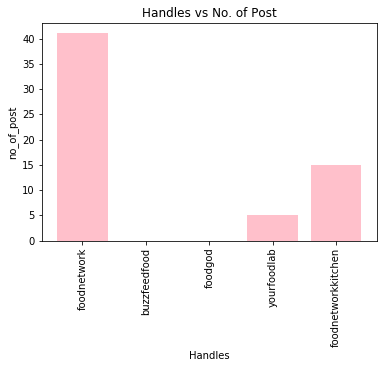

In [12]:
# 1.3 Depict this information using a suitable graph.
plt.bar(handles,number_of_posts,color='pink')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('no_of_post')
plt.title('Handles vs No. of Post')
plt.show()

In [13]:
# 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle
top_5_post_content={}
for t in top_5_blog:
    post_content={}
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.send_keys(t)
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')
    driver.implicitly_wait(5)
    data.click()
    driver.implicitly_wait(10)
    driver.execute_script('window.scrollBy(0,500);')
    for p in range(10):
        if p==0:
            data=driver.find_element_by_xpath('//div[@class="_9AhH0"]')
            driver.execute_script('window.scrollBy(0,50);')
            data.click()
            driver.implicitly_wait(10)
            num='post'+str(p+1)
            data=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
            value=data.text
            post_content[num]=value 
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))).click()
        elif p!=0 and p<=9:
            driver.implicitly_wait(10)
            num='post'+str(p+1)
            data=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
            value=data.text
            post_content[num]=value        
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))).click()
            
    close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
    close.click()
            
    
    top_5_post_content[t]=post_content
print(top_5_post_content)

{'foodnetwork': {'post1': "Churro Pancakes (with @mollyyeh)\n\nBrunch just got even better with Molly's extra fluffy pancakes! 🙌🥞 Watch an all-new #GirlMeetsFarm Sunday @ 11a|10c. #WeCook\n\nSave the recipe on the @FoodNetworkKitchen app!", 'post2': 'The #WeCookTogether weekend starts TODAY at 12|11c on the @FoodNetworkKitchen app! 🎉 Join us for 10 all-new live cooking classes. SWIPE 👉 for the full schedule!! @wolfiesmom, @conantnyc, @bobbyflay, @tylerflorence, @chefamandaf, @guarnaschelli, @chefmarcmurphy, @chefsymon and @jettila will be cooking live from their homes! Set your reminders now 👏', 'post3': 'Don’t miss @guarnaschelli making turkey nachos with a HOMEMADE cheese sauce (!!) at 12|11c on the @foodnetworkkitchen app for our #WeCookTogether weekend! 🎉', 'post4': 'Calling all fans of #RestaurantImpossible! @ChefIrvine, @tombury1 + @TaniyaNayak want to answer YOUR questions — about renovations, past RI missions, the sledgehammer, anything! 🔨 Submit them below and you may see them

In [14]:
# 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word
total_words_with_freq={}
for i in top_5_post_content:
    val=top_5_post_content[i]
    for j in range(10):
        post_number='post'+str(j+1)
        new_val=val[post_number]
        final_val=new_val.split()
        for k in final_val:
            if k[0]=='#':
                ans=k[1:]
                if ans in total_words_with_freq:
                    total_words_with_freq[ans]+=1
                else:
                    total_words_with_freq[ans]=1
print(total_words_with_freq)


{'GirlMeetsFarm': 1, 'WeCook': 4, 'WeCookTogether': 8, 'RestaurantImpossible!': 1, 'SouthernKitchen': 1, 'BuddyVsDuff': 1, 'SymonDinners': 1, 'FoodNetworkKitchen': 13, 'bringme': 1, 'portlandtravel': 1, 'sushirestuarant': 1, 'sushi': 1, 'oregontravel': 1, 'sustainability': 1, 'ALLINCHALLENGE': 1, 'foodgod': 1, 'recipe': 4, 'foodie': 7, 'streetfood': 3, 'indiancuisine': 5, 'mango': 1, 'mangoseason': 1, 'summerseason': 1, 'sanjyotkeer': 3, 'stayhome': 5, 'staysafe': 4, 'stopmotion': 1, 'creative': 1, 'ripirrfankhan': 1, 'foodporn': 1, 'pizza': 1, 'pasta': 1, 'sandwich': 1, 'recipes': 1, 'instafood': 1, 'instagood': 1, 'Foodie': 1, 'matar': 1, 'Indiancuisine': 1, 'contestalert': 2, 'ReadyJetCook!': 1, 'ReadyJetCook': 1, 'FixMeAPlate': 2}


In [39]:
# 2.3 Create a csv file with two columns : the word and its frequency
li_2d=[]
for i in total_words_with_freq:
    small=[]
    small.append(i)
    small.append(total_words_with_freq[i])
    li_2d.append(small)
final_data=np.array(li_2d)
dataset=pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
dataset.to_csv('New_Word_Frequency.csv',index=False)
print(dataset)

                  Word Frequency
0               WeCook         4
1         SymonDinners         1
2       WeCookTogether         4
3   FoodNetworkKitchen        13
4             VivsTips         1
5            TasteTest         1
6         BuddyVsDuff:         1
7             StarWars         1
8          GalaxysEdge         1
9          BuddyVsDuff         1
10             bringme         1
11      portlandtravel         1
12     sushirestuarant         1
13               sushi         1
14        oregontravel         1
15      sustainability         1
16      ALLINCHALLENGE         1
17             foodgod         1
18              recipe         3
19              foodie         6
20       indiancuisine         4
21          streetfood         2
22         sanjyotkeer         3
23            stayhome         5
24            staysafe         4
25          stopmotion         1
26            creative         1
27       ripirrfankhan         1
28            foodporn         1
29        

In [15]:
# 2.4 Now, find the hashtags that were most popular among these bloggers

new_total_words_with_freq=sorted(total_words_with_freq,key=total_words_with_freq.get,reverse=True)
print('Top 5 Hashtags')
print()
top_5_hash=[]
top_5_times=[]
for i in range(5):
    top_5_hash.append(new_total_words_with_freq[i])
    top_5_times.append(total_words_with_freq[new_total_words_with_freq[i]])
for j in range(5):
    print(top_5_hash[j],'',top_5_times[j])

Top 5 Hashtags

FoodNetworkKitchen  13
WeCookTogether  8
foodie  7
indiancuisine  5
stayhome  5


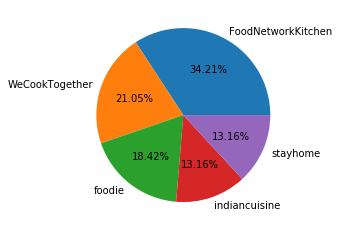

In [16]:
# 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were 
# used by these bloggers in the scraped posts.

plt.pie(top_5_times,labels=top_5_hash,autopct="%.2f%%")
plt.show()


In [71]:
# 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier
from selenium.common.exceptions import NoSuchElementException
top_5_post_likes={}
for t in top_5_blog:
    post_likes={}
    count=0
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.send_keys(t)
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')
    data.click()
    driver.implicitly_wait(10)
    for i in range(12):
        driver.execute_script('window.scrollBy(0,2000);')
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')
    for j in range(12):
        driver.execute_script('window.scrollBy(0,-2000);')
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')
    final=data
    driver.implicitly_wait(10)
    for p in range(len(final)):
        if count>9:
            break  
        try:
            data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')
            final=len(data)
            driver.implicitly_wait(10)
            data[p].click()
            driver.implicitly_wait(10)
            
            data=driver.find_element_by_xpath('//button[@class="sqdOP yWX7d     _8A5w5    "]')
            val=data.text
            sp=val.split(' ')
            val1=sp[0]
            driver.execute_script('window.scrollBy(0,30);')
            if val=='':
                close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
                close.click()
                continue
            
            if sp[1]=='views' :
                close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
                close.click()
                continue
                
            val1=val1.replace(',','')
            ans=int(val1)
            count+=1
            number='post'+str(count)
            post_likes[number]=ans
            close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
            close.click()
            
        except NoSuchElementException:
            close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]')
            close.click()
    
    top_5_post_likes[t]=post_likes
print(top_5_post_likes)


{'foodnetwork': {'post1': 1142, 'post2': 2954, 'post3': 8947, 'post4': 9038, 'post5': 9885, 'post6': 11232, 'post7': 10701, 'post8': 11702, 'post9': 32560, 'post10': 18458}, 'buzzfeedfood': {'post1': 954, 'post2': 9269, 'post3': 12549, 'post4': 6032, 'post5': 10388, 'post6': 15788, 'post7': 3861, 'post8': 3945, 'post9': 5919, 'post10': 6013}, 'foodgod': {'post1': 67869, 'post2': 51299}, 'yourfoodlab': {'post1': 15550, 'post2': 18564, 'post3': 29552, 'post4': 25085, 'post5': 9619, 'post6': 19929, 'post7': 14750, 'post8': 27615, 'post9': 35899, 'post10': 24145}, 'foodnetworkkitchen': {'post1': 470, 'post2': 790, 'post3': 1789, 'post4': 995, 'post5': 1367, 'post6': 2721, 'post7': 1277, 'post8': 507, 'post9': 1172, 'post10': 1250}}


In [72]:
# 3.2 Calculate the average likes for a handle
average_5_handle={}
for i in top_5_post_likes:
    count=0
    total_sum=0
    dic=top_5_post_likes[i]
    for j in dic:
        count=count+1
        total_sum+=dic[j]
        average=total_sum//count
    average_5_handle[i]=average
print(average_5_handle)

{'foodnetwork': 11661, 'buzzfeedfood': 7471, 'foodgod': 59584, 'yourfoodlab': 22070, 'foodnetworkkitchen': 1233}


In [73]:
# 3.3 Divide the average likes obtained from the number of followers of the handle to get
# the average followers:like ratio of each handle.
top_5_average_like=[]
dicty={}
top_5_followers=[]
average_followers_likes=[]
for i in average_5_handle:
    top_5_average_like.append(average_5_handle[i])
for i in top_5_blog: 
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.send_keys(i)
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')
    data.click()
    driver.implicitly_wait(10)
    data=BeautifulSoup(driver.page_source,'html.parser')
    new_data=data.a.span
    final_data=new_data['title']
    final_data=int(final_data.replace(',',''))
    final_data
    dicty[i]=final_data
for i in dicty:
    top_5_followers.append(dicty[i])
for i in range(len(top_5_followers)):
    val=top_5_average_like[i]/top_5_followers[i]
    average_followers_likes.append(val)
for i in range(len(top_5_followers)):   
    print(top_5_blog[i],average_followers_likes[i])

foodnetwork 0.0011293920479022615
buzzfeedfood 0.0019888627942896663
foodgod 0.01655321244946928
yourfoodlab 0.020437134282250993
foodnetworkkitchen 0.002747344567811282


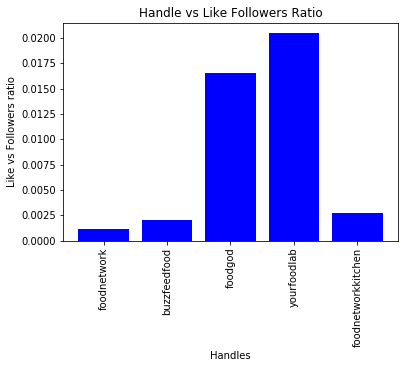

In [74]:
# 3.4 Create a bar graph to depict the above obtained information.
plt.bar(top_5_blog,average_followers_likes,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()
